In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

Requirement already up-to-date: sklearn in c:\users\silho\anaconda3\lib\site-packages (0.0)


In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [4]:
koi_dipositions=df["koi_disposition"].unique().tolist()
col_names=df.columns.tolist()

# Set features. This will also be used as your x values.
selected_features = df.drop("koi_disposition",axis=1)
y=df["koi_disposition"]

# Scale your data
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(selected_features)

X_train_scaled=X_scaler.transform(selected_features)

# cross_validation

In [7]:
knn = KNeighborsClassifier(n_neighbors=16)

In [8]:
scores = cross_val_score(knn,X_train_scaled,y,cv=10,scoring="accuracy")

In [9]:
print(scores)

[0.76285714 0.79113019 0.78111588 0.83404864 0.81831187 0.80400572
 0.87553648 0.8397711  0.83118741 0.79685265]


In [10]:

print(scores.mean())

0.8134817085632535


In [11]:
#search for an optimal value of K for KNN
k_range=range(1,30,2)
k_scores=[]

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X_train_scaled,y,cv=10,scoring="accuracy")
    k_scores.append(scores.mean())
print(k_scores)

[0.7863014510525241, 0.8008910688739015, 0.8078994481912936, 0.8173427345187001, 0.8127647659922339, 0.8147676272225629, 0.8139092581238504, 0.8146249744533007, 0.8140531371346823, 0.8117655834866134, 0.8130519108931127, 0.8120496627835683, 0.8143378295524218, 0.8121927243000204, 0.8141951767831597]


Text(0, 0.5, 'Cross-validated accuracy')

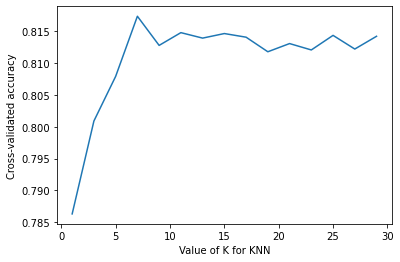

In [12]:
#plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)

plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

# More efficient parameter tuning using GridSearchCV

### Allows you to define a grid of parameters that will be searched using K-fold cross-validation

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
#define the parameter values that should be searched
k_range=range(1,50,2)
print(k_range)

range(1, 50, 2)


In [15]:
#create a parameter grid: map the parameter names to the values that should be searched
param_grid=dict(n_neighbors=k_range)
print(param_grid)
#knn model
knn_model=KNeighborsClassifier()

{'n_neighbors': range(1, 50, 2)}


In [16]:
grid = GridSearchCV(knn_model,param_grid,cv=10,scoring="accuracy")

In [17]:
#fit the grid with data
grid.fit(X_train_scaled,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50, 2)}, scoring='accuracy')

In [18]:
#view the complete results (list of named tuples)

print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.n_splits_)
print(grid._get_param_names)

{'n_neighbors': 7}
0.8173427345187001
KNeighborsClassifier(n_neighbors=7)
10
<bound method BaseEstimator._get_param_names of <class 'sklearn.model_selection._search.GridSearchCV'>>


In [19]:
dir(grid)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_check_n_features',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'iid',
 'inverse_transform',
 'multimetric_',
 'n_features_in_',
 'n_jobs',
 'n_splits_',
 'param_grid',
 'pre_

In [20]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'knn_model.sav'
joblib.dump(grid, filename)

['knn_model.sav']